# SQLAlchemy Homework - Surfs Up!

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

In [87]:
# Import dependencies
import matplotlib.dates as mdates     
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import sqlalchemy
# From dependencies 
from sqlalchemy import create_engine, func, inspect, Table, Column, Integer, String, MetaData
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.sql.expression import exists
from sqlalchemy import extract 
from sqlalchemy.orm import Session
from datetime import datetime
from sqlalchemy import MetaData
from sqlalchemy import Table

# Step 1 - Climate Analysis and Exploration

Use SQLAlchemy create_engine to connect to your sqlite database.

In [7]:
# Create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
print(engine)

Engine(sqlite:///Resources/hawaii.sqlite)


In [8]:
# Reflect your tables into classes and save a reference to station and measurement
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()



['measurement', 'station']

In [13]:
# Saver into variable
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create connection
session = Session(engine)

## Precipitation Analysis

In [14]:
# Inspect tables of new variables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
# Getting Columns Name
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Design a query to retrieve the last 12 months of precipitation data.
engine.execute("SELECT date, prcp FROM measurement LIMIT 10").fetchall()



[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01)]

In [21]:
# Select only the date and prcp values.
dates = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
        filter(Measurement.date <= "2017-08-23").\
        group_by(Measurement.date).all()
dates[:10]
                

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [31]:
# Creat DataFrame values for precipitation
date = [dates[0] for dates in dates[0:]]
prcp= [dates[1] for dates in dates[0:]]
prcp_df= pd.DataFrame(dates[0:], columns=['date', 'prcp'] )
prcp_df.set_index('date', inplace=True, )
prcp_df.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [32]:
#from datetime import datetime as DateTime, timedelta as TimeDelta
prcp_list = prcp_df["prcp"].tolist()

In [49]:
# Sort the DataFrame values by date
dates_df = pd.DataFrame(dates, columns=['date','prcp'])

dates_df.sort_values(by='date',ascending= True) 
dates_df.rename(columns={0:"Date",1:"Precipitation"},inplace =True)
dates_df.set_index('date')
dates_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
361,2017-08-19,0.00
362,2017-08-20,0.00
363,2017-08-21,0.00
364,2017-08-22,0.00


Text(0.5, 1.0, 'Hawaii´s precipitation 2016-2017')

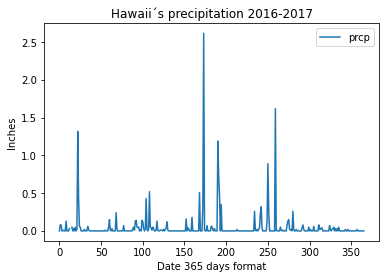

In [54]:
# Plot the results using the DataFrame plot method.
# fig, ax = plt.subplots()
# ax.bar(prcp_df.index, prcp_list,color='b',align='center', label="Precipitation")
# x
# fig.autofmt_xdate()
# plt.title('Hawaii Precipitation in the Last 12 months')
# plt.xlabel('Date')
# plt.ylabel("Precipitation")
# plt.tight_layout()
# plt.show()

dates_df.plot()
fig.autofmt_xdate()
plt.xlabel('Date 365 days format')
plt.ylabel('Inches')
plt.title('Hawaii´s precipitation 2016-2017')

In [55]:
#Use Pandas to print the summary statistics for the precipitation data.
dates_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


## Station Analysis


In [56]:
# Inspect tables of new variables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [57]:
#List the stations and observation counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
#Create Dataframe
active_stations_df = pd.DataFrame(active_stations, columns=['station','name'])
active_stations_df

,station,name
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [62]:
# Design a query to calculate the total number of stations.
len(active_stations_df)

9

In [64]:
# Design a query to find the most active stations.

active_stations_temp = [result[1] for result in active_stations[0:]]
len(active_stations_temp)

9

In [185]:
# Which station has the highest number of observations
most_observation = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
most_observation[0] 

('USC00519281', 2772)

In [66]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).


active_stations_temps= session.query(Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-23").\
                       filter(Measurement.station == "USC00519281").all()

all_temps = [z[0] for z in active_stations_temps]
all_temps[:10]

[77.0, 77.0, 80.0, 80.0, 75.0, 73.0, 78.0, 77.0, 78.0, 80.0]

<Figure size 432x288 with 0 Axes>

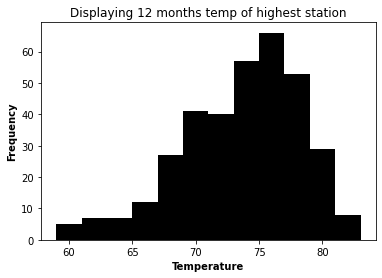

<Figure size 432x288 with 0 Axes>

In [67]:
#Plot the results as a histogram with bins=12.
plt.hist(all_temps, bins=12, color="black")
plt.title("Displaying 12 months temp of highest station")
labels = ['tobs']
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
plt.figure(2)

# Bonus

## Temperature Analysis

In [69]:
#Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.
Temp=[]
start_date='2016-08-01'
end_date='2017-08-01'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
    #print(str(TMAX))
    #print(str(TMIN))
    #print(str(TAVG))
calc_temps(start_date, end_date)
Temp

[87.0, 58.0, 74.64288840262581]

In [70]:
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

## Temperature Analysis II

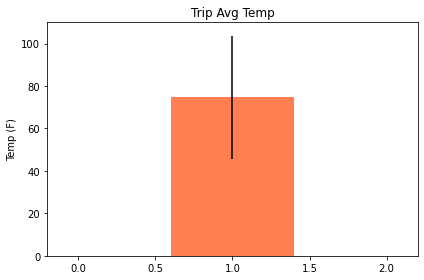

In [74]:
#PLot Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
fig = plt.figure()
plt.bar( 1,TAVG, color = 'coral', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()

## Daily Rainfall Average

In [75]:
#Calculate the rainfall per weather station using the previous year's matching dates.
Rainfall_results = session.query(Measurement.station, func.count(Measurement.prcp)).\
                   group_by(Measurement.station).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
Rainfall_results

[('USC00513117', 365),
 ('USC00514830', 261),
 ('USC00516128', 331),
 ('USC00517948', 67),
 ('USC00519281', 365),
 ('USC00519397', 361),
 ('USC00519523', 320)]

In [98]:
for i in range(1,16):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [101]:
#Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.
dates=[]
daily_normals_Three_AVG=[]
daily_normals_TMAX=[]
daily_normals_TMIN=[]
daily_normals_TAVG=[]
trip_month= 1
trip_days=range(1, 16)

In [102]:
#Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals 
dates=[]
daily_normals_Three_AVG=[]
daily_normals_TMAX=[]
daily_normals_TMIN=[]
daily_normals_TAVG=[]

trip_month= 1
trip_days=range(1, 16)

def daily_normals():
    
    for i in range(1,16):
        results=session.query(Measurement.date.label("dates"), func.max(Measurement.tobs).label("max_tobs"),\
                             func.min(Measurement.tobs).label("min_tobs"),func.avg(Measurement.tobs).label("avg_tobs")).\
                             filter(extract('month', Measurement.date)==trip_month).\
                             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date)
        results
        for res in results.all():
             print( res)
        
        res
        TMAX = res.max_tobs
        TMIN= res.min_tobs
        TAVG= res.avg_tobs
        Date= res.dates
        
        data = [TMAX, TMIN, TAVG]
        #avg = [float(sum(col))/len(col) for col in zip(*data)]

        dates.append(Date)
        #daily_normals_Three_AVG.append(avg)
        daily_normals_TMAX.append(TMAX)
        daily_normals_TMIN.append(TMIN)
        daily_normals_TAVG.append(TAVG)
        
daily_normals()

('2010-01-01', 75.0, 65.0, 69.71428571428571)
('2011-01-01', 77.0, 69.0, 72.14285714285714)
('2012-01-01', 71.0, 63.0, 68.42857142857143)
('2013-01-01', 72.0, 69.0, 70.5)
('2014-01-01', 75.0, 65.0, 68.66666666666667)
('2015-01-01', 71.0, 63.0, 66.28571428571429)
('2016-01-01', 74.0, 62.0, 68.16666666666667)
('2017-01-01', 74.0, 62.0, 69.33333333333333)
('2010-01-02', 75.0, 61.0, 67.0)
('2011-01-02', 74.0, 70.0, 72.0)
('2012-01-02', 71.0, 63.0, 65.8)
('2013-01-02', 73.0, 67.0, 70.0)
('2014-01-02', 77.0, 69.0, 73.625)
('2015-01-02', 72.0, 60.0, 65.0)
('2016-01-02', 73.0, 69.0, 71.83333333333333)
('2017-01-02', 74.0, 66.0, 69.2)
('2010-01-03', 77.0, 67.0, 74.0)
('2011-01-03', 74.0, 69.0, 72.28571428571429)
('2012-01-03', 70.0, 63.0, 65.71428571428571)
('2013-01-03', 70.0, 66.0, 68.28571428571429)
('2014-01-03', 73.0, 65.0, 68.25)
('2015-01-03', 72.0, 62.0, 66.42857142857143)
('2016-01-03', 75.0, 63.0, 68.5)
('2017-01-03', 73.0, 63.0, 67.66666666666667)
('2010-01-04', 76.0, 72.0, 75.0)
('2

In [103]:
#Convert into DF
Daily_normals_df= pd.DataFrame({'Date': dates, 'TMAX': daily_normals_TMAX, 'TMIN': daily_normals_TMIN,'TAVG': daily_normals_TAVG,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,TMAX,TMIN,TAVG
Date,,,
2017-01-01,74.0,62.0,69.333333
2017-01-02,74.0,66.0,69.200000
2017-01-03,73.0,63.0,67.666667
2017-01-04,73.0,62.0,67.166667
2017-01-05,72.0,63.0,67.500000


<Figure size 648x792 with 0 Axes>

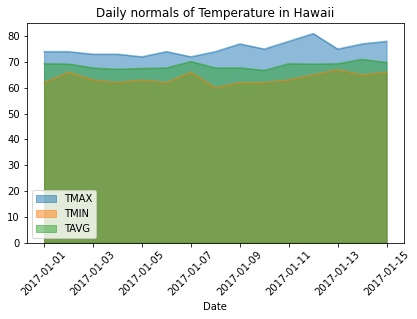

In [96]:
# Use Pandas to plot an area plot (stacked=False) for the daily normals.
fig = plt.figure(figsize=(9, 11))
ax = Daily_normals_df.plot(kind='area', stacked=False, title='Daily normals of Temperature in Hawaii')
ax.set_xlabel('Date')
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('Daily normals of Temperature in Hawaii.png', bbox_inches = 'tight')
plt.show()

In [106]:
print(f"The weather for New Years Eve is chilles with almost no variation, Hawaii here we go!")

The weather for New Years Eve is chilles with almost no variation, Hawaii here we go!


# Step 2 - Climate App

Design a Flask API based on the queries that you have just developed.

In [248]:
# import Dependencies
import numpy as np
import sqlalchemy
#from dependencies
from sqlalchemy import create_engine, func ,inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from flask import Flask, jsonify


In [249]:
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [250]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [251]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [252]:
# Flask Setup
#################################################
app = Flask(__name__)

## Routes 

In [1]:
# @app.route("/")
# def home():
#     return("/api/v1.0/precipitation<br/>"
#     "/api/v1.0/stations<br/>"
#     "/api/v1.0/tobs<br/>"
#     "/api/v1.0/2017-01-01<br/>")

## Results from terminal


rober@DESKTOP-Q2UPQVR MINGW64 ~/GitHub/sqlalchemy-challenge (master)
$ python app.py
 * Serving Flask app "app" (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: on
 * Restarting with windowsapi reloader
 * Debugger is active!
 * Debugger PIN: 136-198-092
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)

## Temperature Analysis I